<a href="https://colab.research.google.com/github/andretocci/LAAIA1/blob/main/FIA_Pos_DS_LAAIA1_Aula_6_Analytics_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema da Aula: Analytics - Regressão - 06.10.2020

[Drive Interno](https://drive.google.com/drive/folders/1y2uJBUamc_GV3ytrYTEaX-h5zHuNzvVf)

[Notion: Anotações da aula: Teste de Hipótese](https://www.notion.so/Regress-o-Linear-bdcbabe259754707bea7431b1987af6b)

## Links e Referências

- [Simple and Multiple Linear Regression in Python](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)
- [Multiple Linear Regression: Sklearn and Statsmodels](https://medium.com/@subarna.lamsal1/multiple-linear-regression-sklearn-and-statsmodels-798750747755)
- [In Depth: Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

## Imports

In [8]:
import statsmodels.api as sm

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

## Regressão Linear Simples

### Case: Captação Alunos

Um gestor de uma instituição de ensino está planejando a abertura de novas vagas para cursos
de ensino superior, e gostaria de utilizar os dados de aprovados no ensino médio do ano anterior
para estimar o potencial de público alvo que teria para trabalhar com ações de marketing. Para
isso, ele analisou os dados disponíveis dos estudantes aprovados, por Estado do Brasil, dos
últimos 2 anos (2015 e 2016). Ele gostaria de saber se é possível utilizar os dados do último ano
para estimar o percentual de aprovados no ano corrente (2017).

In [4]:
path = "/content/drive/My Drive/Cursos/FIA_Pos_DS-LAAIA1/Analytics I/6. Regressão Linear/"
file = "Captacao_Alunos.txt"

# define the data/predictors as the pre-set feature names  
df = pd.read_csv(path + file, '\t')

df.head()

,Estado,X2015,Y2016
0,Alagoas,66.1,72.37
1,Amapa,68.8,70.47
2,Amazonas,78.6,84.67
3,Bahia,67.2,69.57
4,Ceara,80.4,82.77


#### Correlação

Existe uma forte correlação POSITIVA (r=0,84)
entre as duas variáveis, ou seja, os estados que
apresentaram maior nota em 2015 também
apresentaram maior nota em 2016.

In [7]:
df['X2015'].corr(df['Y2016'])

0.8412061539491265

### Regressão Linear

R2 é o coeficiente de determinação, que pode ser calculado pelo quadrado do coeficiente de correlação. Quanto maior o valor de R^2, mais bem ajustado é o modelo regressão. Valores de R^2 acima de 0,5 já indicam bom ajuste, 0\<R2 \<1. Ele pode ser interpretado com o \% da variabilidade explicada da variável y pela x.

INTERPRETAÇÃO:

- b0 é 15,91: quando o percentual de aprovados em 2015 é zero,
em 2016 é 15,91.
- b1 é 0,84: quando aumenta 1 p.p. no percentual de aprovação no
ano de 2015, aumenta em 0,84 o percentual de aprovação no ano
de 2016.
- R2 é 0,71: 71% da variabilidade do percentual de aprovados de
2016 é explicado pelo percentual de aprovados de 2015, indicando
um bom ajuste do modelo aos dados.

                            OLS Regression Results                            
Dep. Variable:                  Y2016   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     58.09
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           7.36e-08
Time:                        21:56:51   Log-Likelihood:                -70.437
No. Observations:                  26   AIC:                             144.9
Df Residuals:                      24   BIC:                             147.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9139      7.886      2.018      0.0

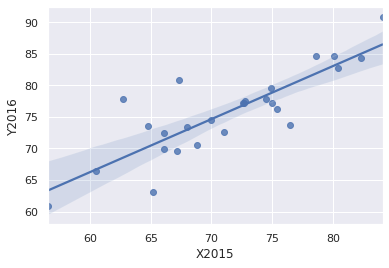

In [11]:
X = df["X2015"] ## X usually means our input variables (or independent variables)
y = df["Y2016"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
sns.regplot(x="X2015", y="Y2016", data=df)

### Case: Imobiliario

In [18]:
path = "/content/drive/My Drive/Cursos/FIA_Pos_DS-LAAIA1/Analytics I/6. Regressão Linear/"
file = "Regressao linear simples.xls"

# define the data/predictors as the pre-set feature names  
df = pd.read_excel(path + file, 'Imobiliario')

df.head()

,Id_Imovel,Idade_imovel,Distancia_metro_Km,Comercios_proximos,Mil_reais_m2
0,1,32.0,1.083595,10,7.58
1,2,19.5,1.396946,9,8.44
2,3,13.3,1.544789,5,9.46
3,4,13.3,1.544789,5,10.96
4,5,5.0,1.456010,5,8.62


                            OLS Regression Results                            
Dep. Variable:     Distancia_metro_Km   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.715e+32
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:26:53   Log-Likelihood:                 14283.
No. Observations:                 413   AIC:                        -2.856e+04
Df Residuals:                     411   BIC:                        -2.855e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -2.22e-16   6.62

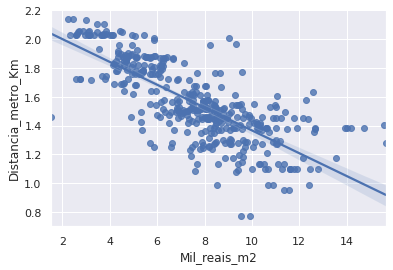

In [21]:
col1, col2 = 'Mil_reais_m2', 'Distancia_metro_Km'

X = df[col1] ## X usually means our input variables (or independent variables)
y = df[col2] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
sns.regplot(x=col1, y=col2, data=df)

## Regressão Linear Multipla

- Passo 1: Fazer a Análise Exploratória Univariada.
- Passo 2: Fazer a análise bidimensional (ou bivariada) da
resposta vs variável explicativa para investigar as relações
lineares ou não, e investigar o quanto as covariáveis
auxiliariam na explicação da resposta.
- Passo 3: Fazer a análise bidimensional das covariáveis entre
si para identificar correlação entre elas utilizando a
correlação de Pearson e gráfico de dispersão.

### Relação entre as variáveis explicativas

- A **multicolinearidade** refere-se a correlação entre as variáveis explicativas do modelo.
- Quando as variáveis explicativas são altamente correlacionadas, não é possível determinar o
efeito separado de uma particular variável explicativa na variável resposta.
- Quando a multicolinearidade é grave, pode ocorrer troca do sinal de alguns parâmetros do
modelo. Neste caso, os coeficientes individuais tornam-se questionáveis na presença da
multicolinearidade.
- Uma forma de avaliar o efeito da multicolinearidade entre duas variáveis é retirar uma das
covariáveis do modelo e avaliar a alteração do valor do R2 ajustado. Manter no modelo a covariável que maximizar o R2 ajustado.

Sempre devemos colocar covariavies que acrescentam informações diferentes!

### R Quadrado Ajustado

Coeficiente de Determinação  **R Quadrado**: proporção da variabilidade da resposta explicada pela equação de regressão

múltipla estimada. Em geral, sempre se eleva quando são adicionadas variáveis explicativas no modelo.

Para evitar superestimação do impacto de se adicionar mais uma variável independente no modelo, usamos a
seguinte correção do **R Quadrado**

### Case: Predição de Limite de Cheque Especial

Uma instituição financeira tem objetivo de estimar o valor de Limite de Cheque Especial para
seus novos clientes, com base em informações disponíveis em seu banco de dados. Para o
estudo, foi disponibilizado uma amostra histórica de clientes com as informações de Idade,
Rendimento Total, Salário, Limite de Crédito Imediato para investigar se é possível estimar o
Limite do Cheque Especial com base nas características disponibilizadas. Avalie a possibilidade de
fornecer uma “regra” por meio de um modelo estatístico, interprete como as informações
predizem o evento de interesse e qual a performance desta “regra”.

In [24]:
path = "/content/drive/My Drive/Cursos/FIA_Pos_DS-LAAIA1/Analytics I/6. Regressão Linear/"
file = "Regressao linear multipla.xls"

# define the data/predictors as the pre-set feature names  
df = pd.read_excel(path + file, "Limite_Credito")

df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,72,4300,4300,2000,1000
1,75,4400,4400,3000,1000
2,66,4800,4800,440,1500
3,35,5000,5000,1000,1000
4,69,5000,5000,2000,2500


#### Correlação

Analisando a correlação entre as variáveis identificamos que há uma alta correlação entre as variáveis de *Rendimento Total* e *Salario*, apesar de apresentarem uma forte correlação com o nosso *target* *Limite de Cheque Especial*

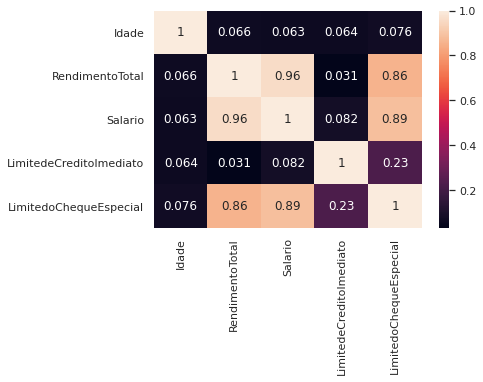

In [27]:
sns.heatmap(df.corr(), annot=True)
plt.show()

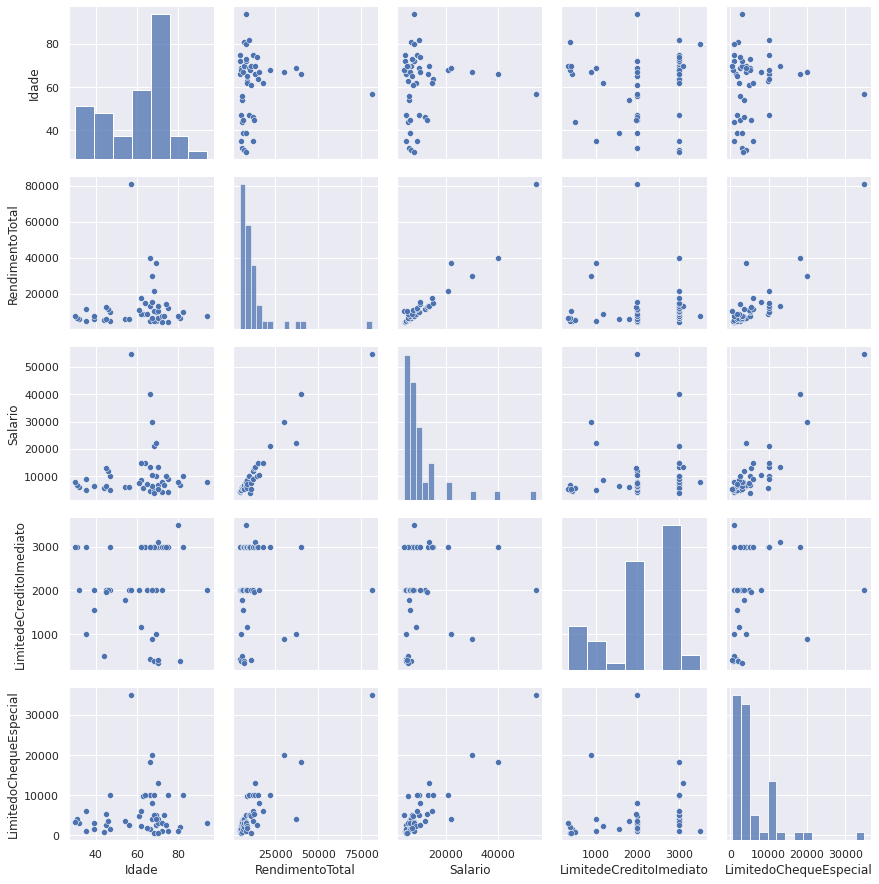

In [25]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

sns.pairplot(df)

#### Modelando

Ajuste o modelo sem a variável rendimento total
que apresentou alta correlação com o salário.

Na regressão linear múltipla, pode-se ter
várias **variáveis** com **nível descritivo superior
a 0,10**. Neste caso, deve-se escolher um
método para seleção de variáveis.
Neste case, será utilizado o método
Backward de eliminação de variáveis.

**F-statistic:**

Testa a hipótese de que existe relação linear de pelo menos uma
variável explicativa pela variável resposta. Quando este valor(*Prob (F-statistic):*) for
< 0,10 concluímos que existe relação linear de pelo menos uma
variável explicativa em relação a variável resposta.

In [33]:
col1, col2 = ['Idade', 'Salario', 'LimitedeCreditoImediato'], 'LimitedoChequeEspecial'
df.columns
X = df[col1] ## X usually means our input variables (or independent variables)
y = df[col2] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.801
Method:                     Least Squares   F-statistic:                     64.23
Date:                    Tue, 27 Oct 2020   Prob (F-statistic):           4.09e-16
Time:                            23:08:53   Log-Likelihood:                -445.84
No. Observations:                      48   AIC:                             899.7
Df Residuals:                          44   BIC:                             907.2
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Realizar o processo de redução,
iniciando pela variável com maior nível
descritivo, e rodar o modelo novamente.

Adotando, nível de significância de 0,10,
todos os parâmetros são diferentes de zero.

In [34]:
col1, col2 = ['Salario', 'LimitedeCreditoImediato'], 'LimitedoChequeEspecial'
df.columns
X = df[col1] ## X usually means our input variables (or independent variables)
y = df[col2] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Tue, 27 Oct 2020   Prob (F-statistic):           3.66e-17
Time:                            23:09:17   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Limite do Cheque Especial = -2636,56049 + 0,5757*Salário + 1,015*Limite de Crédito Imediato
R^2-ajustado: 0,8057

Interpretação do coeficiente de regressão:

- 0,5757 é o aumento esperado do Limite do Cheque Especial correspondente ao aumento de 1 unidade no
Salário, quando seu Limite de Crédito Imediato é considerado constante.
- Similarmente, 1,015 é o aumento esperado do Limite do Cheque Especial correspondente ao aumento de 1 unidade do Limite de Crédito Imediato, quando o Salário é mantido constante.

Interpretação do R^2-ajustado:

- 81% da variabilidade do Limite do Cheque Especial é explicada pelas variáveis Salário e Limite de Crédito
Imediato pela Regressão Linear Múltipla.

#### Plot Previsto vs Realizado

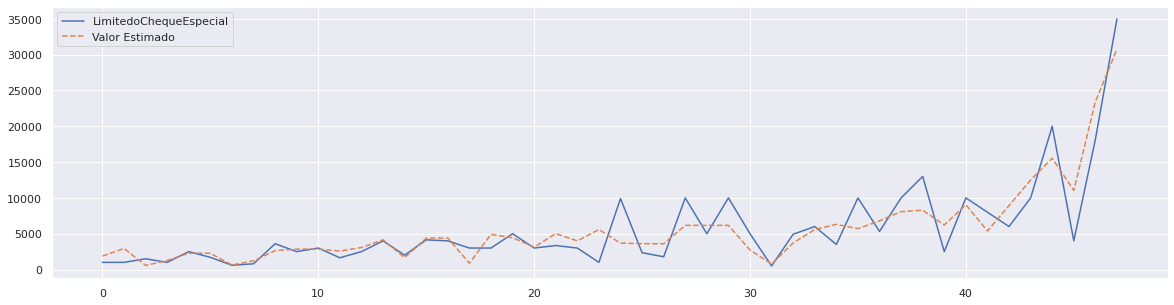

In [59]:
predictions = model.predict(X)

fig, ax = plt.subplots(figsize=(20, 5))
ax = plt.axes()

y.plot()
predictions.plot(label = 'Valor Estimado', ls='--')

plt.legend()

### Case: Predição de Limite de Cheque Especial Variável: Dummie



In [84]:
path = "/content/drive/My Drive/Cursos/FIA_Pos_DS-LAAIA1/Analytics I/6. Regressão Linear/"
file = "Regressao linear multipla.xls"

# define the data/predictors as the pre-set feature names  
df = pd.read_excel(path + file, "Limite_Credito (2)")

df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


#### Correlação

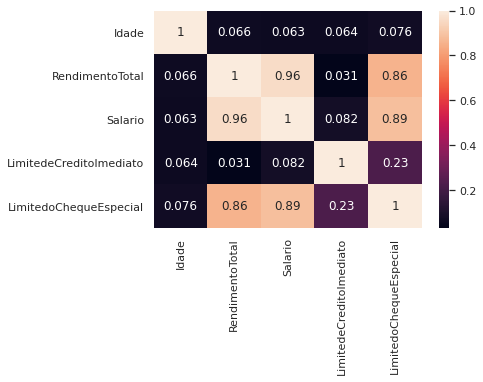

In [62]:
sns.heatmap(df.corr(), annot=True)
plt.show()

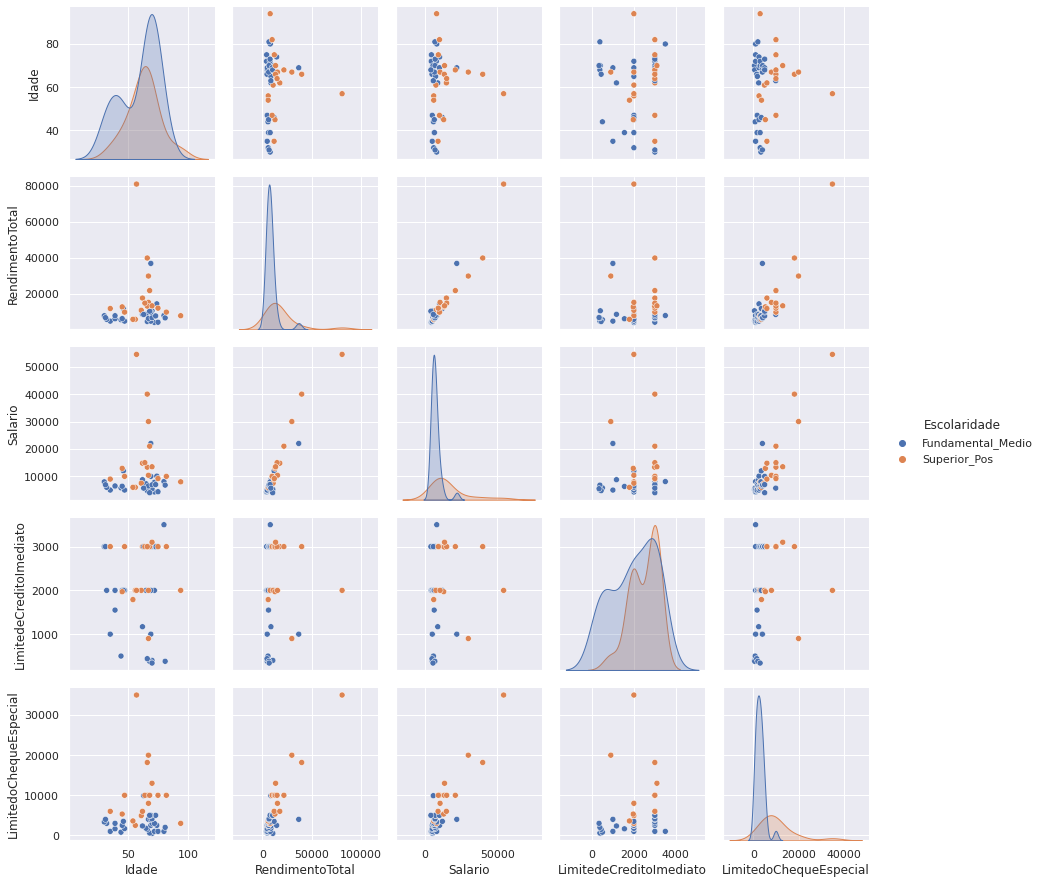

In [65]:
sns.pairplot(df,hue="Escolaridade")

#### Dummies

In [85]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Superior_Pos
0,70,10736,5214,400,500,0
1,68,5000,5000,380,600,0
2,44,5800,5800,500,800,0
3,72,4300,4300,2000,1000,0
4,75,4400,4400,3000,1000,0


##### Correlação

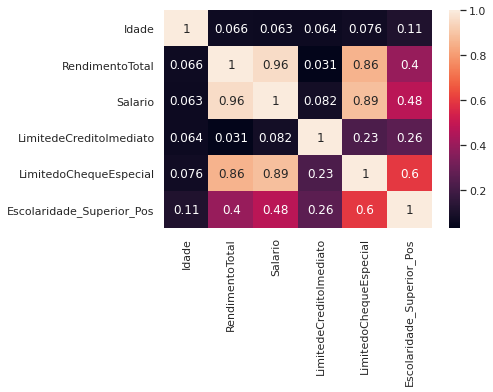

In [73]:
sns.heatmap(df.corr(), annot=True)
plt.show()

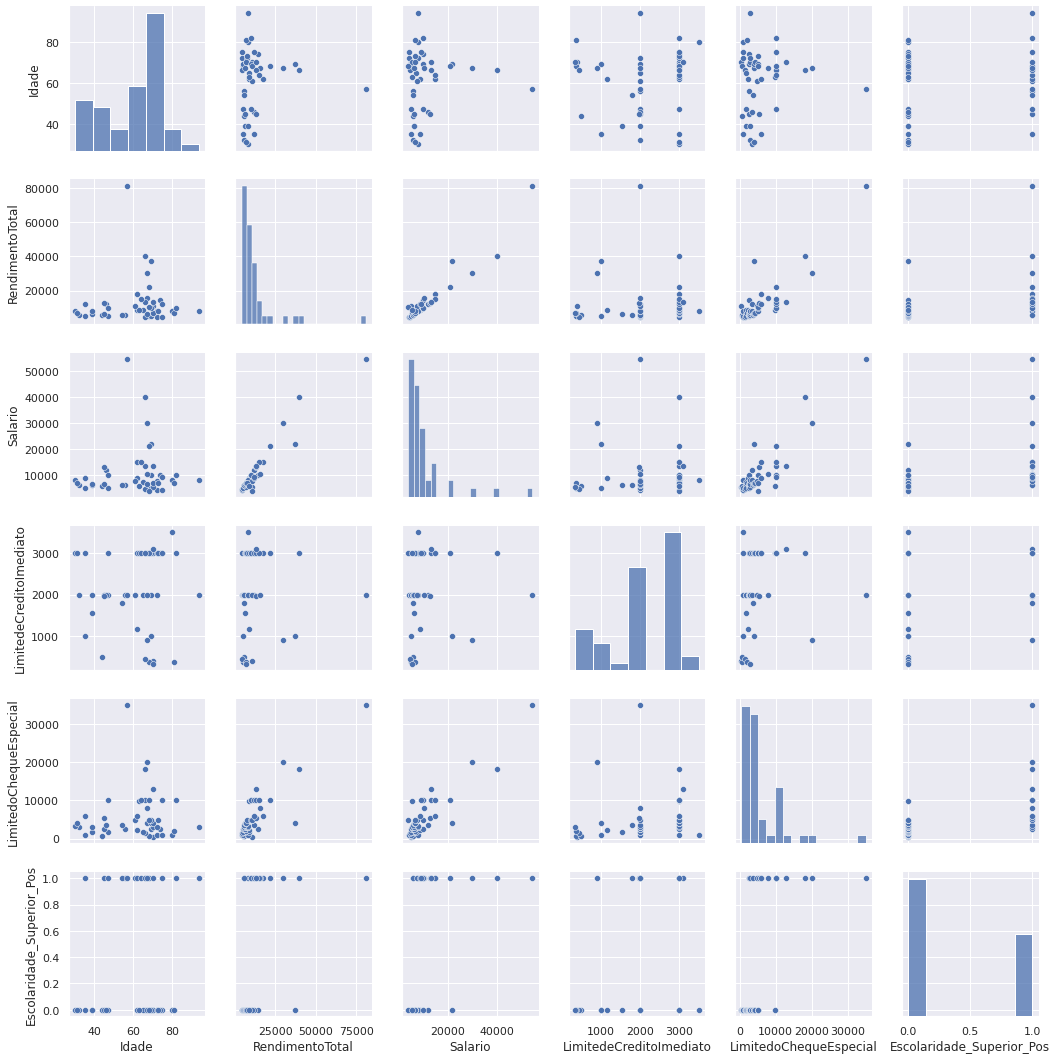

In [72]:
sns.pairplot(df)

#### Modelando

In [86]:
col1, col2 = ['Salario', 'LimitedeCreditoImediato', 'Escolaridade_Superior_Pos'], 'LimitedoChequeEspecial'
df.columns
X = df[col1] ## X usually means our input variables (or independent variables)
y = df[col2] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.842
Model:                                OLS   Adj. R-squared:                  0.831
Method:                     Least Squares   F-statistic:                     77.92
Date:                    Wed, 28 Oct 2020   Prob (F-statistic):           1.23e-17
Time:                            01:28:52   Log-Likelihood:                -442.00
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          44   BIC:                             899.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#### Plot Previsto vs Realizado




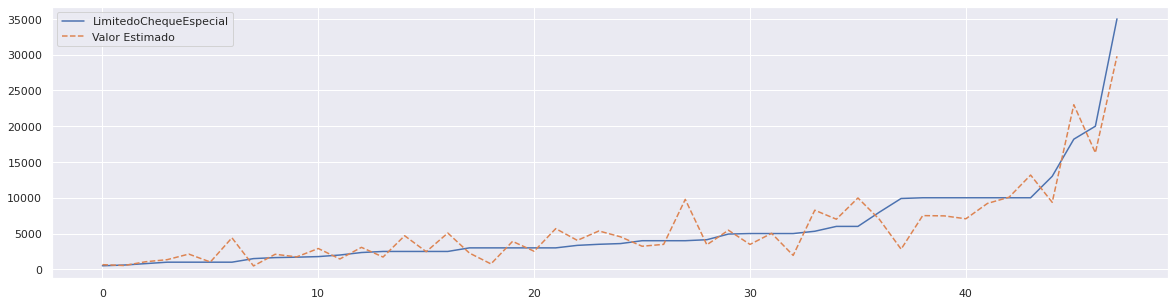

In [76]:
predictions = model.predict(X)

fig, ax = plt.subplots(figsize=(20, 5))
ax = plt.axes()

y.plot()
predictions.plot(label = 'Valor Estimado', ls='--')

plt.legend()

### Case: Predição de Limite de Cheque Especial Variável: More Dummies 

In [87]:
path = "/content/drive/My Drive/Cursos/FIA_Pos_DS-LAAIA1/Analytics I/6. Regressão Linear/"
file = "Regressao linear multipla.xls"

# define the data/predictors as the pre-set feature names  
df = pd.read_excel(path + file, "Base Limite_Credito (3)")

df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,Genero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


#### Dummies

In [88]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Superior_Pos,Regiao_SP,Genero_M
0,70,10736,5214,400,500,0,0,0
1,68,5000,5000,380,600,0,0,0
2,44,5800,5800,500,800,0,0,0
3,72,4300,4300,2000,1000,0,0,0
4,75,4400,4400,3000,1000,0,0,0


#### Modelando

In [89]:
col1, col2 = ['Salario', 'LimitedeCreditoImediato', 'Escolaridade_Superior_Pos', 'Regiao_SP',	'Genero_M'], 'LimitedoChequeEspecial'
df.columns
X = df[col1] ## X usually means our input variables (or independent variables)
y = df[col2] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.880
Model:                                OLS   Adj. R-squared:                  0.866
Method:                     Least Squares   F-statistic:                     61.83
Date:                    Wed, 28 Oct 2020   Prob (F-statistic):           2.82e-18
Time:                            01:30:31   Log-Likelihood:                -435.26
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          42   BIC:                             893.7
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

##### Retirando Limite de Crédito

In [91]:
col1, col2 = ['Salario', 'Escolaridade_Superior_Pos', 'Regiao_SP',	'Genero_M'], 'LimitedoChequeEspecial'
df.columns
X = df[col1] ## X usually means our input variables (or independent variables)
y = df[col2] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.880
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     78.87
Date:                    Wed, 28 Oct 2020   Prob (F-statistic):           3.15e-19
Time:                            01:35:29   Log-Likelihood:                -435.33
No. Observations:                      48   AIC:                             880.7
Df Residuals:                          43   BIC:                             890.0
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#### Retirando Escolaridade_Superior_Pos  

In [94]:
col1, col2 = ['Salario', 'Regiao_SP',	'Genero_M'], 'LimitedoChequeEspecial'
df.columns
X = df[col1] ## X usually means our input variables (or independent variables)
y = df[col2] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Wed, 28 Oct 2020   Prob (F-statistic):           3.24e-20
Time:                            01:37:44   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

#### Plot Previsto vs Realizado

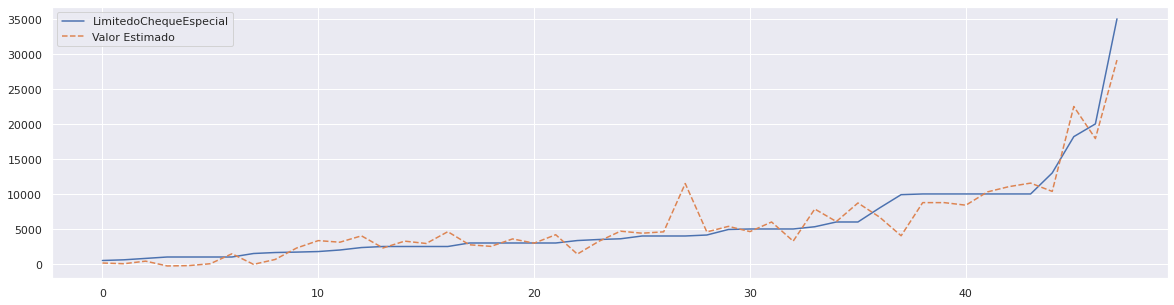

In [93]:
predictions = model.predict(X)

fig, ax = plt.subplots(figsize=(20, 5))
ax = plt.axes()

y.plot()
predictions.plot(label = 'Valor Estimado', ls='--')

plt.legend()